In [1]:
import torch
from torch import nn
from torch.autograd import Variable
from skimage import io, transform
from torchvision import transforms, utils

import numpy as np
import os

from matplotlib import pyplot as plt

from models import * 

%matplotlib inline  

# Mitochondria Data

NameError: name 'rgb2gray' is not defined

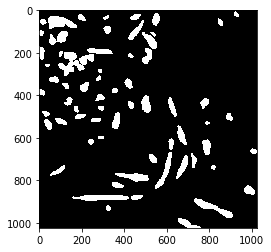

<Figure size 432x288 with 0 Axes>

In [2]:
mito_dir = './datasets/mitochondria/'

img = plt.imread('./datasets/mitochondria/training/labels/mitos_3D.010.png')


plt.imshow(img*255)
plt.figure()

plt.imshow(rgb2gray(img),cmap="gray")


print(np.max(img[0,:,2]))



In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def import_mito(mito_dir): 
    
    mito_train_img_dir = mito_dir+'training/images/'
    mito_train_lbl_dir = mito_dir+'training/labels/'
    
    mito_test_img_dir = mito_dir+'testset/'

    
    mito_val_img_dir = mito_dir+'validation/images/'
    mito_val_lbl_dir = mito_dir+'validation/labels/'
    
    mito_train_imgs = import_dir(mito_train_img_dir)
    mito_train_lbls = import_dir(mito_train_lbl_dir)
    
    mito_train_lbls = np.sum(mito_train_lbls, axis=3)
    mito_train_lbls[mito_train_lbls!=0]=1
    
    '''
    mito_train_lbls_gray = []
    for img in mito_train_lbls:
        mito_train_lbls_gray.append(rgb2gray(img))
    mito_train_lbls = np.array(mito_train_lbls_gray)
    
    
    '''    
    
    mito_test_imgs = import_dir(mito_test_img_dir)
    
    mito_val_imgs = import_dir(mito_val_img_dir)
    mito_val_lbls = import_dir(mito_val_lbl_dir)
    
    mito_val_lbls = np.sum(mito_val_lbls, axis=3)
    mito_val_lbls[mito_val_lbls!=0]=1
    
    '''
    mito_val_lbls_gray = []
    for img in mito_val_lbls:
        mito_val_lbls_gray.append(rgb2gray(img))
    mito_val_lbls = np.array(mito_val_lbls_gray)
    '''
    
    return mito_train_imgs, mito_train_lbls, mito_val_imgs, mito_val_lbls, mito_test_imgs

def import_dir(dirn): 
    
    files = [f for f in os.listdir(dirn) if os.path.isfile(os.path.join(dirn, f))]
    files.sort()
    
    imgs = []
    for f in files: 
        imgs.append(plt.imread(dirn+f))
    return np.array(imgs)
    
mito_dir = './datasets/mitochondria/'

mito_train_imgs, mito_train_lbls, mito_val_imgs, mito_val_lbls, mito_test_imgs = import_mito(mito_dir)

print(mito_train_imgs.shape)

(20, 1024, 1024)


In [8]:
import sys

new_size = 1024
def training(model, inputs, targets,val,val_target, epochs):
    model.train()
    
    
    
    for epoch in range(epochs): 
        num_batches = 0
        avg_loss = 0
        for (img,lbl) in zip(inputs, targets): 
            
            
            img = transform.resize(img, (new_size, new_size))
            img = np.expand_dims(img, axis=0)
            img = np.expand_dims(img, axis=0)
            
            

            lbl = transform.resize(lbl, (new_size, new_size))
            lbl = np.expand_dims(lbl, axis=0)
            lbl = np.expand_dims(lbl, axis=0)
            
            


            x = Variable(torch.FloatTensor(img))
            target = Variable(torch.FloatTensor(lbl))
            
            if GPU: 
                x = x.cuda()
                target = target.cuda()

            optimizer.zero_grad()
            output = model(x)
        
            

            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            avg_loss += loss.data[0]
            print("loss = ",loss.data[0])
            num_batches += 1
  

        avg_loss /= num_batches
        print('epoch: ' + str(epoch) + ', train loss: ' + str(avg_loss))
        
        
        # do one prediction 
        val_img = transform.resize(val[0], (new_size,new_size))
        val_img = np.expand_dims(val_img, axis=0)
        val_img = np.expand_dims(val_img, axis=0)
        val_img = Variable(torch.FloatTensor(img))
        if GPU: 
            val_img = val_img.cuda()
        prediction = model(val_img)
        
        prediction = prediction.data.cpu().numpy()
        prediction = prediction.squeeze()
        
        plt.figure()
        plt.imshow(val_target[0], cmap="gray")
        plt.colorbar()
        
        
        plt.figure()
        plt.imshow(prediction, cmap="gray")
        plt.colorbar()
        plt.show()
        
        
 


GPU is enabled 


/datasets/home/89/189/ltindall/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


loss =  0.7128608822822571
loss =  0.6749820113182068
loss =  0.5447884202003479
loss =  0.4808448553085327
loss =  0.42211174964904785
loss =  0.37517979741096497
loss =  0.3341222107410431
loss =  0.302793949842453
loss =  0.2780894637107849
loss =  0.25750434398651123
loss =  0.2404436618089676
loss =  0.2230718582868576
loss =  0.20369242131710052
loss =  0.1811203509569168
loss =  0.17314240336418152
loss =  0.175690159201622
loss =  0.16718195378780365
loss =  0.17538365721702576
loss =  0.16512009501457214
loss =  0.16136060655117035
epoch: 0, train loss: 0.31247424259781836


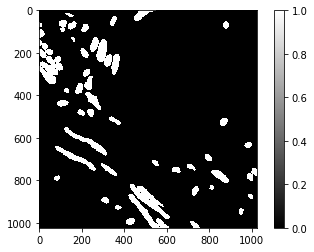

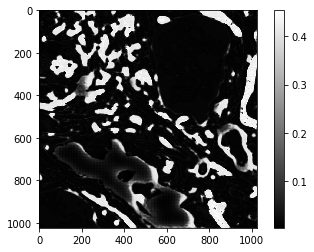

loss =  0.1913917511701584
loss =  0.17055407166481018
loss =  0.16936646401882172
loss =  0.16778676211833954
loss =  0.16320498287677765
loss =  0.1628088802099228
loss =  0.16291944682598114
loss =  0.14716777205467224
loss =  0.15460853278636932
loss =  0.1553562879562378
loss =  0.15853238105773926
loss =  0.14782997965812683
loss =  0.13608571887016296
loss =  0.12953558564186096
loss =  0.12747110426425934
loss =  0.13885396718978882
loss =  0.1342495083808899
loss =  0.16566745936870575
loss =  0.14398165047168732
loss =  0.14210955798625946
epoch: 1, train loss: 0.15347409322857858


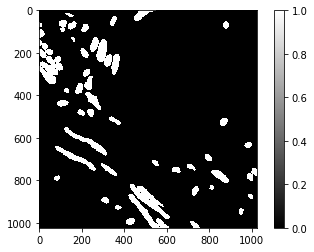

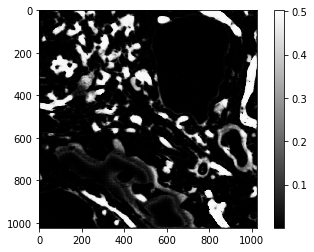

loss =  0.19510863721370697
loss =  0.1629330962896347
loss =  0.16504590213298798
loss =  0.1622990369796753
loss =  0.15955980122089386
loss =  0.15682357549667358
loss =  0.15784713625907898
loss =  0.14637835323810577
loss =  0.1538243144750595
loss =  0.15806396305561066
loss =  0.15769216418266296
loss =  0.1481989026069641
loss =  0.13738185167312622
loss =  0.12951385974884033
loss =  0.1311093419790268
loss =  0.14530427753925323
loss =  0.134709432721138
loss =  0.14441123604774475
loss =  0.14126887917518616
loss =  0.13951553404331207
epoch: 2, train loss: 0.1513494648039341


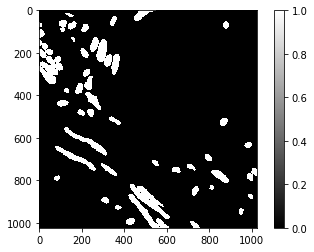

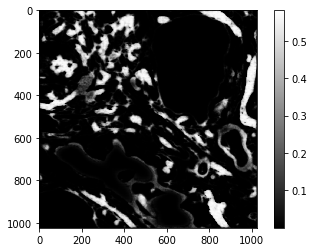

loss =  0.1855389028787613
loss =  0.15954159200191498
loss =  0.15477818250656128
loss =  0.1583046168088913
loss =  0.16297827661037445
loss =  0.16798555850982666
loss =  0.16969628632068634
loss =  0.15166285634040833
loss =  0.14762412011623383
loss =  0.1455484926700592
loss =  0.15531618893146515
loss =  0.14091262221336365
loss =  0.12744474411010742
loss =  0.12215864658355713
loss =  0.12390463799238205
loss =  0.1369919776916504
loss =  0.13194045424461365
loss =  0.1313464641571045
loss =  0.12904588878154755
loss =  0.12608292698860168
epoch: 3, train loss: 0.14644017182290553


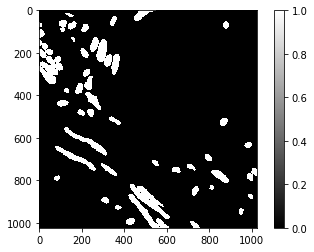

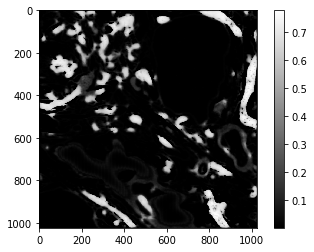

loss =  0.18777456879615784
loss =  0.15084689855575562
loss =  0.14855022728443146
loss =  0.14851731061935425
loss =  0.14598645269870758
loss =  0.15500986576080322
loss =  0.1588497757911682
loss =  0.1483912169933319
loss =  0.14552347362041473
loss =  0.14882470667362213
loss =  0.15643680095672607
loss =  0.14197175204753876
loss =  0.1221834346652031
loss =  0.1178508996963501
loss =  0.11336129903793335
loss =  0.11978583037853241
loss =  0.12546318769454956
loss =  0.1255297064781189
loss =  0.1206108033657074
loss =  0.11753177642822266
epoch: 4, train loss: 0.13994999937713146


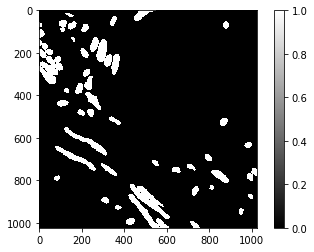

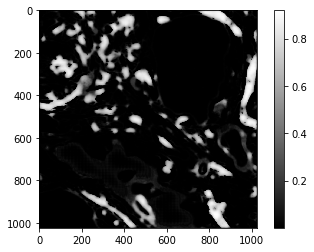

loss =  0.18142357468605042
loss =  0.1560191959142685
loss =  0.15114767849445343
loss =  0.1460569202899933
loss =  0.14113256335258484
loss =  0.15284091234207153
loss =  0.16977238655090332
loss =  0.1370968222618103
loss =  0.13556382060050964
loss =  0.1333271563053131
loss =  0.1347542107105255
loss =  0.11661244183778763
loss =  0.11298614740371704
loss =  0.10895413160324097
loss =  0.10373272746801376
loss =  0.11559613794088364
loss =  0.1193382740020752
loss =  0.12780305743217468
loss =  0.12166319042444229
loss =  0.11408893764019012
epoch: 5, train loss: 0.13399551436305046


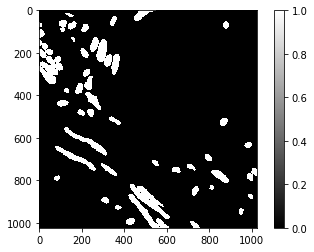

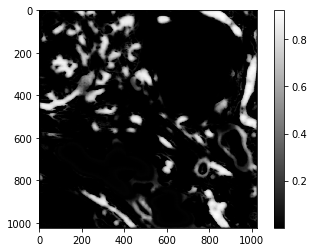

loss =  0.1660030484199524
loss =  0.1443985551595688
loss =  0.13338272273540497
loss =  0.12734586000442505
loss =  0.13306300342082977
loss =  0.1450180560350418
loss =  0.14487537741661072
loss =  0.13037912547588348
loss =  0.13636337220668793
loss =  0.13019219040870667
loss =  0.1457124799489975
loss =  0.11529403924942017
loss =  0.1104695051908493
loss =  0.10628359019756317
loss =  0.09681611508131027
loss =  0.10761033743619919
loss =  0.10594204068183899
loss =  0.11786388605833054
loss =  0.11457328498363495
loss =  0.11194086074829102
epoch: 6, train loss: 0.12617637254297734


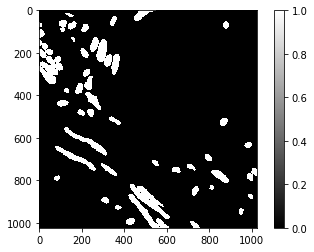

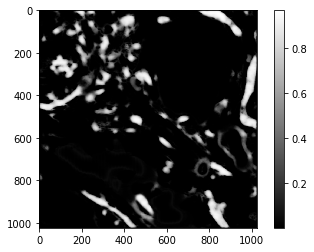

loss =  0.1785554736852646
loss =  0.1392117589712143
loss =  0.13946469128131866
loss =  0.13416384160518646
loss =  0.12665854394435883
loss =  0.13663949072360992
loss =  0.1301679164171219
loss =  0.12036318331956863
loss =  0.12042483687400818
loss =  0.13384979963302612
loss =  0.12804195284843445
loss =  0.1064227744936943
loss =  0.10473918914794922
loss =  0.10717812180519104
loss =  0.1008506715297699
loss =  0.10540489107370377
loss =  0.10693573951721191
loss =  0.10738528519868851
loss =  0.1036643385887146
loss =  0.10205484926700592
epoch: 7, train loss: 0.12160886749625206


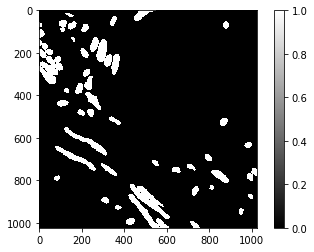

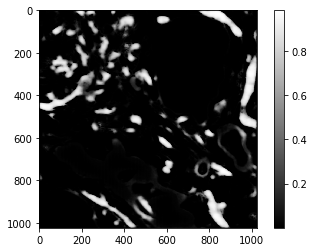

loss =  0.13988786935806274
loss =  0.12897458672523499
loss =  0.11953979730606079
loss =  0.1097443625330925
loss =  0.12222271412611008
loss =  0.12484662979841232
loss =  0.11681539565324783
loss =  0.10529423505067825
loss =  0.10991520434617996
loss =  0.11834174394607544
loss =  0.11465054750442505
loss =  0.11103851348161697
loss =  0.09258068352937698
loss =  0.09419101476669312
loss =  0.09332484006881714
loss =  0.11100310832262039
loss =  0.10756374895572662
loss =  0.09980753809213638
loss =  0.09277752041816711
loss =  0.09382134675979614
epoch: 8, train loss: 0.11031707003712654


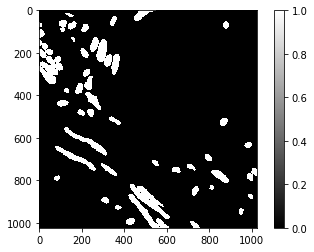

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/datasets/conda-envs/gym/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-c8a66174ca63>", line 15, in <module>
    training(un,mito_train_imgs, mito_train_lbls, mito_val_imgs, mito_val_lbls, 1000)
  File "<ipython-input-8-e32ea9458d32>", line 72, in training
    plt.show()
  File "/datasets/conda-envs/gym/lib/python3.6/site-packages/matplotlib/pyplot.py", line 253, in show
    return _show(*args, **kw)
  File "/datasets/conda-envs/gym/lib/python3.6/site-packages/ipykernel/pylab/backend_inline.py", line 36, in show
    display(figure_manager.canvas.figure)
  File "/datasets/conda-envs/gym/lib/python3.6/site-packages/IPython/core/display.py", line 298, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/datasets/conda-envs/gym/lib/python3.6/site-packages/IPython/core/formatters.py", line 18

KeyboardInterrupt: 

In [10]:
# Prep GPU
GPU = torch.cuda.is_available()
print("GPU is {}enabled ".format(['not ', ''][GPU]))



un = unet(1,1)

if GPU: 
    un = un.cuda()

optimizer = torch.optim.Adam(un.parameters(), lr=0.01)
criterion = nn.BCELoss()

training(un,mito_train_imgs, mito_train_lbls, mito_val_imgs, mito_val_lbls, 1000)

In [140]:
whos

Variable          Type            Data/Info
-------------------------------------------
Image             module          <module 'PIL.Image' from <...>e-packages/PIL/Image.py'>
Variable          type            <class 'torch.autograd.variable.Variable'>
a                 ndarray         1024x1024: 1048576 elems, type `uint8`, 1048576 bytes (1.0 Mb)
conv_block        type            <class 'models.conv_block'>
cv2               module          <module 'cv2' from '/data<...>36m-x86_64-linux-gnu.so'>
hist_full         ndarray         10x1: 10 elems, type `float32`, 40 bytes
i                 int             0
image             PngImageFile    <PIL.PngImagePlugin.PngIm<...>4x1024 at 0x7F4AD73E65C0>
img               ndarray         1024x1024: 1048576 elems, type `float32`, 4194304 bytes (4.0 Mb)
import_dir        function        <function import_dir at 0x7f4a1a88cae8>
import_mito       function        <function import_mito at 0x7f49ffea6f28>
mito_dir          str             ./datasets/mi